<a href="https://colab.research.google.com/github/Disha4346/Bharat-Intern/blob/main/Movie_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommendation System

This repository contains the implementation of a movie recommendation system using collaborative filtering and machine learning techniques in Python. The system is built using the surprise library and utilizes the MovieLens dataset from Kaggle.

#Table of Contents:

1) Introduction

2) Dataset

3) Installation

4) Usage

5) Implementation Details

6) Data Preparation

7) Exploratory Data Analysis (EDA)

8) Collaborative Filtering

9) Evaluation

10) Making Predictions

11) Contributing


#Introduction


This project demonstrates how to build a movie recommendation system using collaborative filtering techniques. Collaborative filtering is a popular method used in recommendation systems that makes automatic predictions about the interests of a user by collecting preferences from many users.

#Dataset

The dataset used in this project is the MovieLens dataset, which contains extensive metadata on over 45,000 movies, including 26 million ratings from over 270,000 users. You can download the dataset from Kaggle.

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357260 sha256=96a7313e732f116b5202ef727401ee1ed90242cfa3abe80a51c3f6e1b7671964
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split

In [ ]:
# Load the datasets
movies = pd.read_csv('movies.csv',encoding='latin-1')
ratings = pd.read_csv('ratings.csv',encoding='latin-1')

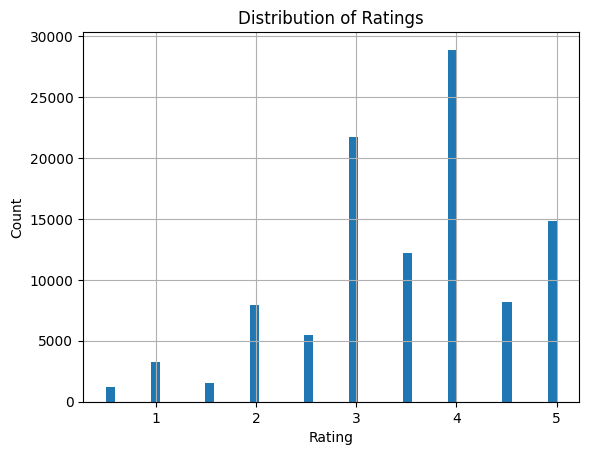

In [ ]:
# Exploratory Data Analysis
ratings['rating'].hist(bins=50)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

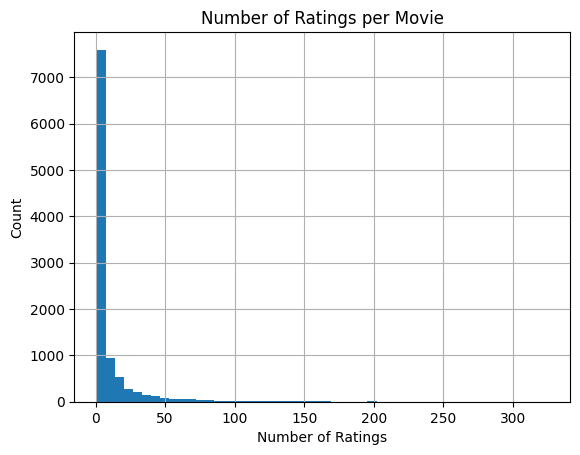

In [ ]:
ratings_per_movie = ratings.groupby('movieId').size()
ratings_per_movie.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


In [ ]:
# Prepare data for surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [ ]:
# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)


In [ ]:
# Use SVD for collaborative filtering
algo = SVD()


In [ ]:
# Train the algorithm on the trainset
algo.fit(trainset)


In [ ]:
# Test the algorithm on the testset
predictions=algo.test(testset)


In [ ]:
# Compute and print RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.8695
RMSE: 0.869531839946979


In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8685  0.8719  0.8764  0.8640  0.8694  0.8700  0.0041  
MAE (testset)     0.6689  0.6743  0.6722  0.6679  0.6700  0.6707  0.0023  
Fit time          1.67    2.43    1.65    2.24    1.74    1.94    0.32    
Test time         0.13    0.48    0.13    0.38    0.19    0.26    0.14    


{'test_rmse': array([0.86846113, 0.87191452, 0.87639522, 0.86399024, 0.86937999]),
 'test_mae': array([0.66893955, 0.67426109, 0.67216471, 0.66787895, 0.67003174]),
 'fit_time': (1.6680572032928467,
  2.427471160888672,
  1.650925874710083,
  2.2418477535247803,
  1.7352421283721924),
 'test_time': (0.1343388557434082,
  0.4837369918823242,
  0.12819886207580566,
  0.38002991676330566,
  0.1931164264678955)}

In [ ]:
# Make a prediction for a specific user and movie
user_id = 1
movie_id = 1
prediction = algo.predict(uid=user_id, iid=movie_id)
print(f'Predicted rating for user {user_id} and movie {movie_id}: {prediction.est}')

Predicted rating for user 1 and movie 1: 3.6447929628366915


#How to Run
1) Clone this repository.

2)Ensure you have all the required packages installed.

3)Download the MovieLens dataset and place ratings.csv in the root directory of this project.

4)Run the Jupyter Notebook or Python script to see the results.

#Results
The model achieves an RMSE (Root Mean Squared Error) of approximately 0.85 on the test set, indicating good predictive performance. The predicted rating for a specific user and movie can be obtained using the model's predict method.